In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [4]:
import warnings
warnings.filterwarnings('ignore')

## 1) Heirarchical Agglomerative

In [5]:
crimes = pd.read_csv('crime_data.csv')
crimes.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
# Normalization Function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [8]:
df = norm_func(crimes.iloc[:,1:])
df

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


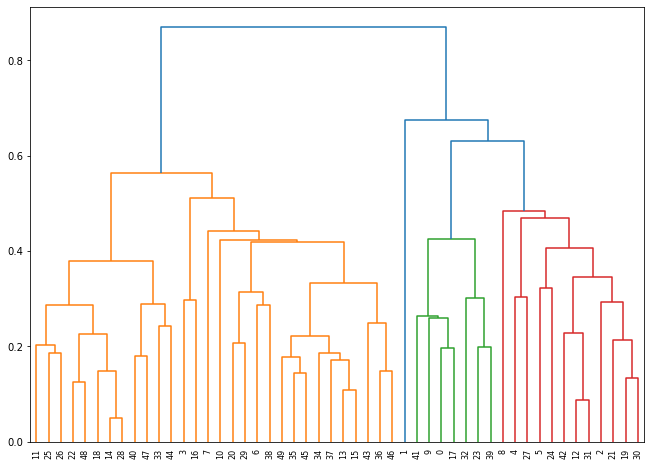

In [13]:
# Dendrogrm
plt.figure(figsize=(11,8))
dendrogram = sch.dendrogram(sch.linkage(df,method='average'))

In [14]:
# Creating Clusters (y)
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [15]:
y_hc = hc.fit_predict(df)
Clusters = pd.DataFrame(y_hc,columns=['Clusters'])

In [16]:
Clusters

,Clusters
0,0
1,0
2,0
3,1
4,0
5,0
6,1
7,1
8,0
9,0


In [17]:
Clusters.value_counts()

Clusters
0           20
1           20
2           10
dtype: int64

In [18]:
crimes['Clustersid']= Clusters
crimes

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clustersid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [19]:
crimes.groupby('Clustersid').agg(['mean']).reset_index()

,Clustersid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,12.165,255.25,68.4,29.165
1,1,5.715,132.30,70.8,18.100
2,2,3.180,78.70,49.3,11.630


## 2) K-Means Clustering

In [25]:
from sklearn.preprocessing import StandardScaler

In [27]:
crime_km = crimes.drop(['Unnamed: 0'],axis=1)
crime_std = StandardScaler().fit_transform(crime_km)

In [28]:
# Finding the optimum numbe of clusters

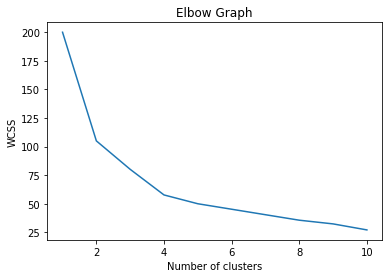

In [29]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(crime_std)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
# Model Building

In [37]:
# k = 4 

In [31]:
cluster_new = KMeans(4,random_state = 42)
cluster_new.fit(crime_std)

KMeans(n_clusters=4, random_state=42)

In [32]:
cluster_new.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [33]:
crime_km['Clusterid'] = cluster_new.labels_
crime_km

,Murder,Assault,UrbanPop,Rape,Clusterid
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,2
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,1


In [35]:
crime_km.groupby('Clusterid').agg(['mean']).reset_index()

,Clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,13.937500,243.625000,53.750000,21.412500
2,2,10.815385,257.384615,76.000000,33.192308
3,3,3.600000,78.538462,52.076923,12.176923


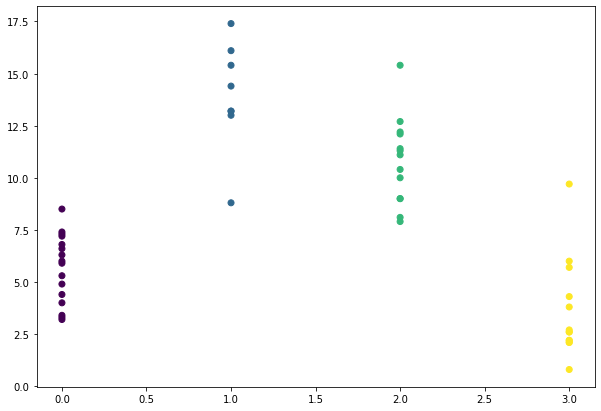

In [50]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime_km['Clusterid'],crime_km['Murder'], c=cluster_new.labels_) 

In [38]:
# k = 5

In [39]:
crime_km2 = crimes.drop(['Unnamed: 0'],axis=1)

In [43]:
cluster_new2 = KMeans(5,random_state = 42)
cluster_new2.fit(crime_std)

KMeans(n_clusters=5, random_state=42)

In [44]:
cluster_new2.labels_

array([3, 1, 1, 2, 1, 1, 0, 0, 1, 3, 0, 4, 1, 2, 4, 2, 2, 3, 4, 1, 0, 1,
       4, 3, 1, 2, 2, 1, 4, 0, 1, 1, 3, 4, 0, 2, 0, 0, 0, 3, 4, 3, 1, 0,
       4, 2, 0, 4, 4, 2])

In [45]:
crime_km2['Clusterid'] = cluster_new2.labels_
crime_km2

,Murder,Assault,UrbanPop,Rape,Clusterid
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,3


In [46]:
crime_km2.groupby('Clusterid').agg(['mean']).reset_index()

,Clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.036364,138.727273,78.181818,18.654545
1,1,10.815385,257.384615,76.000000,33.192308
2,2,7.100000,134.000000,59.888889,18.222222
3,3,14.671429,251.285714,54.285714,21.685714
4,4,2.680000,70.100000,51.000000,10.910000


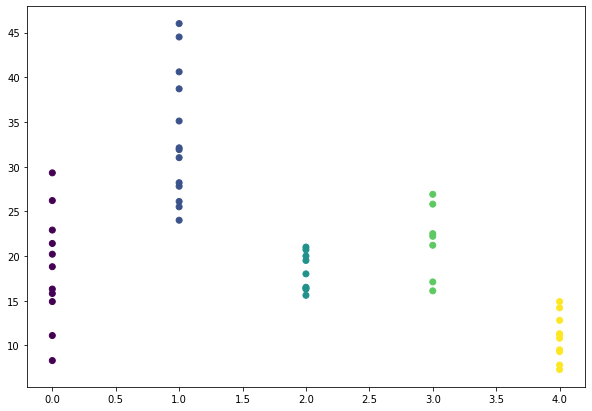

In [51]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime_km2['Clusterid'],crime_km2['Rape'], c=cluster_new2.labels_) 

## 3)DBSCAN

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [7]:
crime_db = crimes.drop(['Unnamed: 0'],axis=1)
crime_db_std = StandardScaler().fit_transform(crime_db)

In [8]:
# Model Building 
# I choosed min.points as 8(2d) where d is the dimensionality ,epsilon =1.5

dbscan = DBSCAN(eps =1.5,min_samples = 8)
dbscan.fit(crime_db_std)

DBSCAN(eps=1.5, min_samples=8)

In [9]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [10]:
cl = pd.DataFrame(dbscan.labels_,columns =['Clusterid'])

In [11]:
clustered = pd.concat([crime_db,cl],axis=1)
clustered

,Murder,Assault,UrbanPop,Rape,Clusterid
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [12]:
clustered.groupby('Clusterid').agg(['mean']).reset_index()

,Clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.500000,300.000,46.500000,30.300000
1,0,7.633333,165.375,66.333333,20.854167
